<a href="https://colab.research.google.com/github/Abhishakth007/ML_-_Data_Science_Projects/blob/main/Iris_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd

import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

import seaborn as sn

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

In [ ]:
iris = load_iris()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(f"Feature_Names : {iris.feature_names}")

print(f"target_names : {iris.target_names}")

print(f"Data_Head : {iris.data[:5]}")

print(f"Target_Head : {iris.target[:5]}")

Feature_Names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names : ['setosa' 'versicolor' 'virginica']
Data_Head : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target_Head : [0 0 0 0 0]


In [ ]:
data = pd.DataFrame(data = iris.data , columns=iris.feature_names)

data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
data['Species'] = iris.target

data.head(5)

data["Species"] = data["Species"].map(lambda x : iris.target_names[x])

data.head(4)

data = data.sample(n = len(data),random_state=10)

data = data.reset_index(drop = True)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,6.3,2.3,4.4,1.3,versicolor
1,6.4,2.7,5.3,1.9,virginica
2,5.4,3.7,1.5,0.2,setosa
3,6.1,3.0,4.6,1.4,versicolor
4,5.0,3.3,1.4,0.2,setosa


Statistics Of The Data

Target_Count : Species
versicolor    50
virginica     50
setosa        50
Name: count, dtype: int64


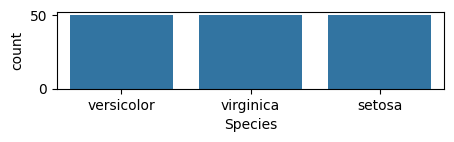

In [ ]:
print(f"Target_Count : {data['Species'].value_counts()}")

plt.figure(figsize = (5,1))

sn.countplot(x=data['Species'] , data = data)

plt.show()

In [ ]:
data.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
Species,0


In [ ]:
flowers_arr = [i for i in data['Species'].unique()]

flowers_arr

[np.str_('versicolor'), np.str_('virginica'), np.str_('setosa')]

In [ ]:
aggregations = ['mean' , 'median', 'min' ,'max']

stats = {}

for i in flowers_arr:

  i = str(i)

  stats[i] = {}

  for j in data.columns:

    if j != "Species":

      stats[i][j] = {}


      for k in aggregations:

        value = getattr(np , k)(data[data["Species"] == i][j])

        stats[i][j][k] = float(value)


In [ ]:
stats

{'versicolor': {'sepal length (cm)': {'mean': 5.936000000000002,
   'median': 5.9,
   'min': 4.9,
   'max': 7.0},
  'sepal width (cm)': {'mean': 2.7700000000000005,
   'median': 2.8,
   'min': 2.0,
   'max': 3.4},
  'petal length (cm)': {'mean': 4.26, 'median': 4.35, 'min': 3.0, 'max': 5.1},
  'petal width (cm)': {'mean': 1.3259999999999998,
   'median': 1.3,
   'min': 1.0,
   'max': 1.8}},
 'virginica': {'sepal length (cm)': {'mean': 6.587999999999999,
   'median': 6.5,
   'min': 4.9,
   'max': 7.9},
  'sepal width (cm)': {'mean': 2.9739999999999998,
   'median': 3.0,
   'min': 2.2,
   'max': 3.8},
  'petal length (cm)': {'mean': 5.5520000000000005,
   'median': 5.55,
   'min': 4.5,
   'max': 6.9},
  'petal width (cm)': {'mean': 2.026, 'median': 2.0, 'min': 1.4, 'max': 2.5}},
 'setosa': {'sepal length (cm)': {'mean': 5.005999999999999,
   'median': 5.0,
   'min': 4.3,
   'max': 5.8},
  'sepal width (cm)': {'mean': 3.428, 'median': 3.4, 'min': 2.3, 'max': 4.4},
  'petal length (cm)': {

In [ ]:
correlation_data = {}

for i in flowers_arr:

  i = str(i)

  correlation_data[i] = {}

  for j in data.columns:

    if j!= "Species":

      sepal_coeff = np.corrcoef(data[data["Species"] == i]['sepal length (cm)'] ,data[data["Species"] == i]['sepal width (cm)']  )

      petal_coeff = np.corrcoef(data[data["Species"] == i]['petal length (cm)'] ,data[data["Species"] == i]['petal width (cm)']  )

      correlation_data[i]['sepal_correlation(length/width)'] = sepal_coeff
      correlation_data[i]['petal_correlation(length/width)'] = petal_coeff

      break



In [ ]:
correlation_data

{'versicolor': {'sepal_correlation(length/width)': array([[1.        , 0.52591072],
         [0.52591072, 1.        ]]),
  'petal_correlation(length/width)': array([[1.        , 0.78666809],
         [0.78666809, 1.        ]])},
 'virginica': {'sepal_correlation(length/width)': array([[1.        , 0.45722782],
         [0.45722782, 1.        ]]),
  'petal_correlation(length/width)': array([[1.        , 0.32210822],
         [0.32210822, 1.        ]])},
 'setosa': {'sepal_correlation(length/width)': array([[1.        , 0.74254669],
         [0.74254669, 1.        ]]),
  'petal_correlation(length/width)': array([[1.        , 0.33163004],
         [0.33163004, 1.        ]])}}

In [ ]:
X = data.drop(['Species'] , axis=1)
y = data['Species']

individual_species_data = {}

for i in flowers_arr:

  for j in X.columns:

    individual_species_data[f"{i}_{j}_data"] = data[data["Species"] == i][j]


In [ ]:
for keys , values in individual_species_data.items():

  print(f"{keys}")

versicolor_sepal length (cm)_data
versicolor_sepal width (cm)_data
versicolor_petal length (cm)_data
versicolor_petal width (cm)_data
virginica_sepal length (cm)_data
virginica_sepal width (cm)_data
virginica_petal length (cm)_data
virginica_petal width (cm)_data
setosa_sepal length (cm)_data
setosa_sepal width (cm)_data
setosa_petal length (cm)_data
setosa_petal width (cm)_data


In [ ]:
individual_species_data['versicolor_sepal length (cm)_data'][:5]

,sepal length (cm)
0,6.3
3,6.1
5,5.0
6,6.3
7,5.8


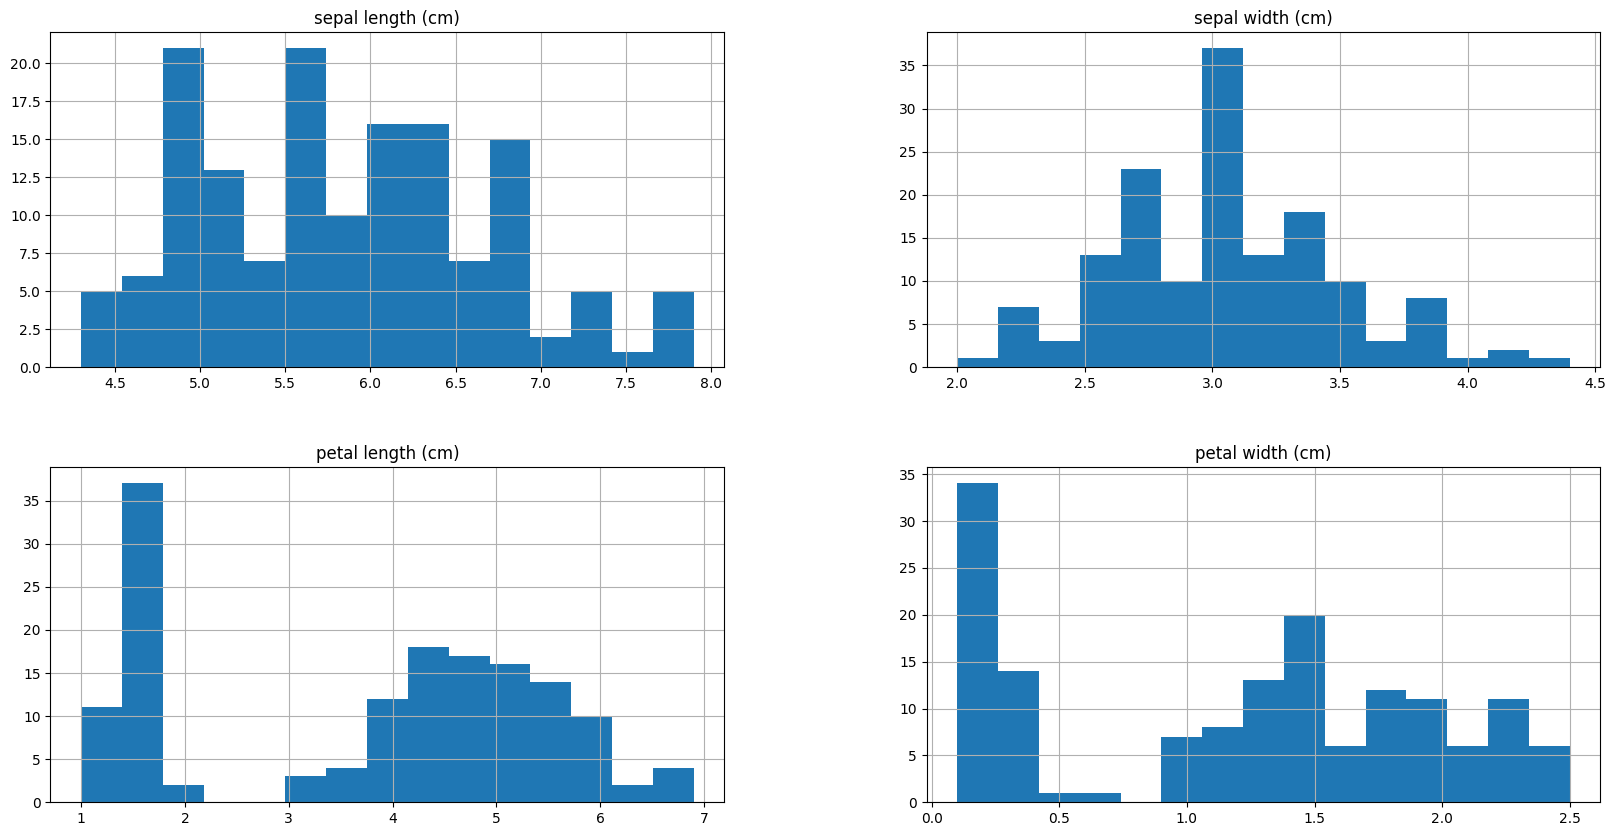

In [ ]:
X.hist(figsize = (20,10) , bins = 15)
plt.show()

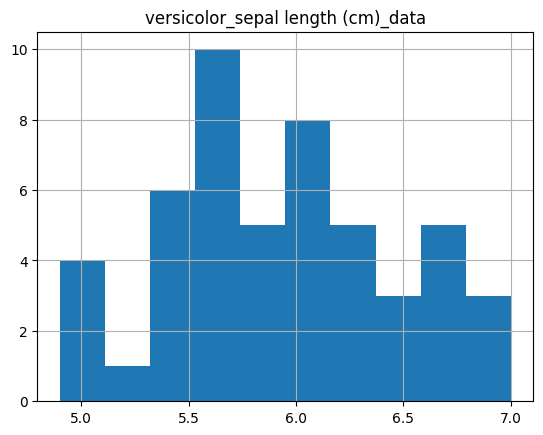

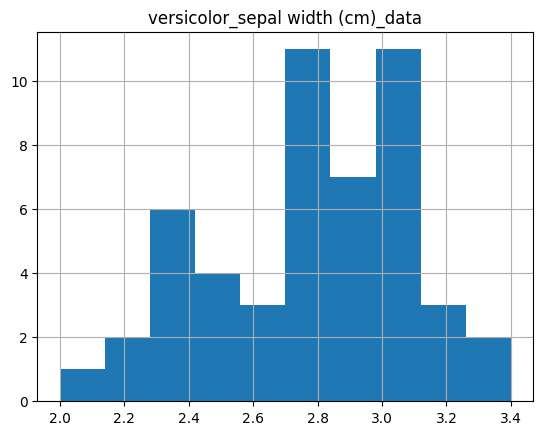

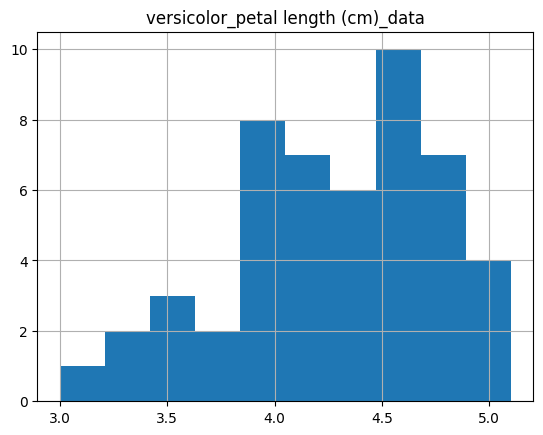

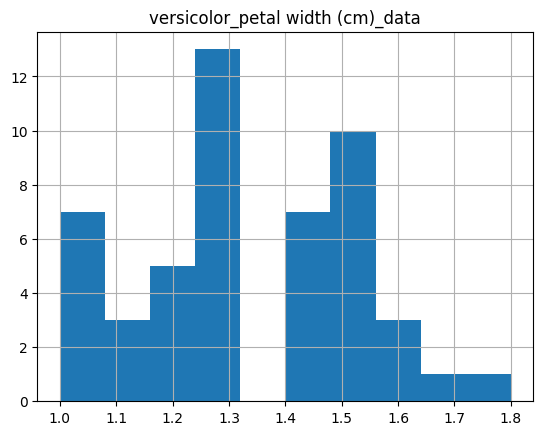

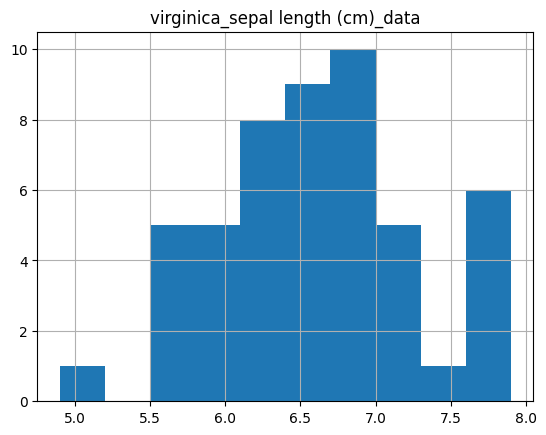

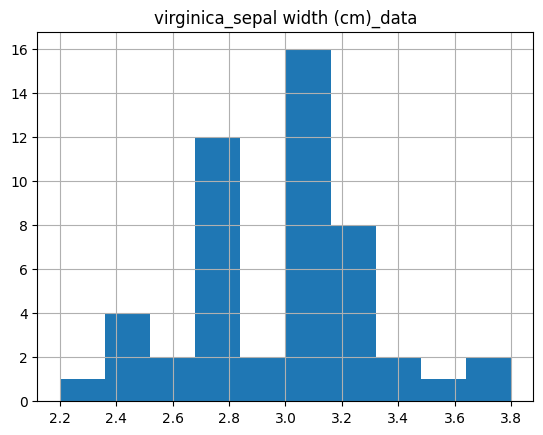

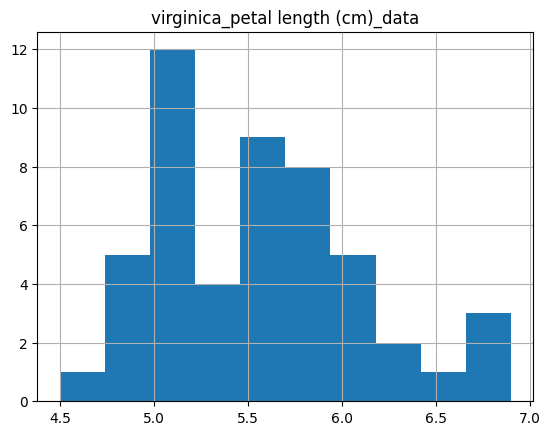

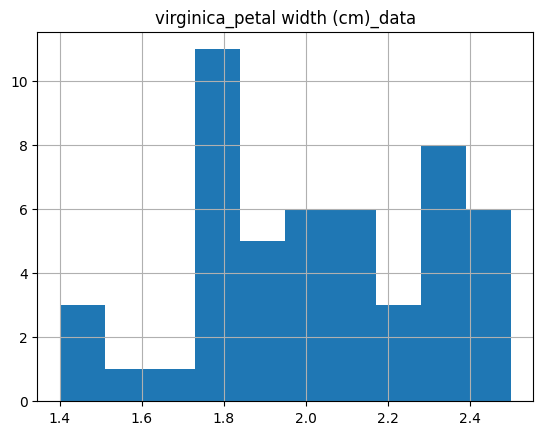

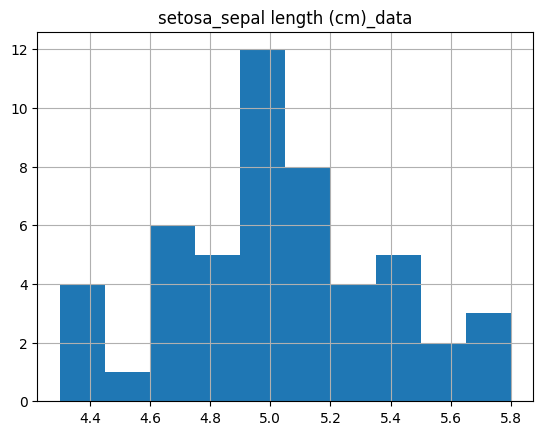

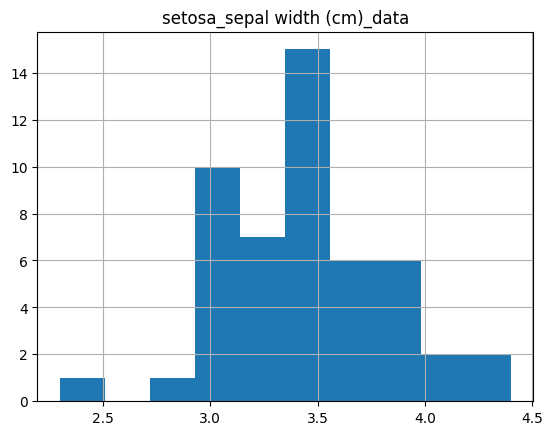

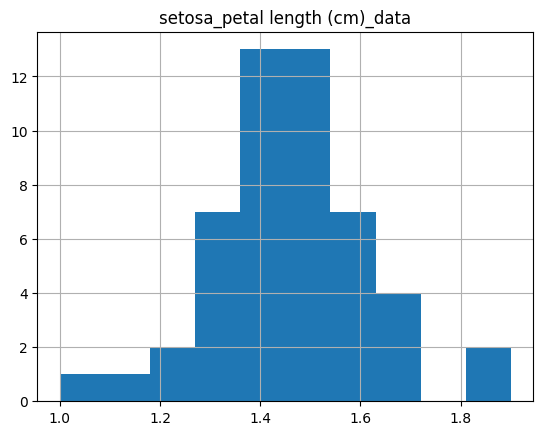

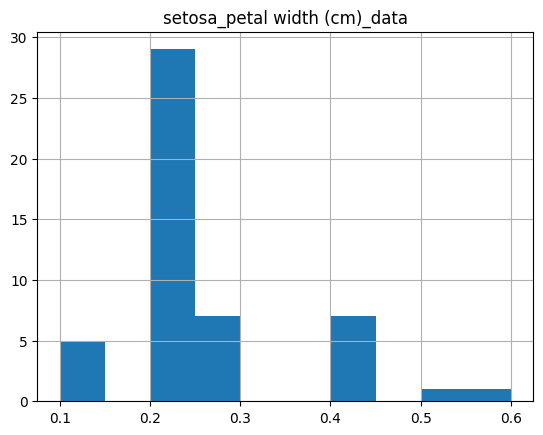

In [ ]:
#Distribution of individual flowers data
for keys , values  in individual_species_data.items():

  values.hist(bins = 10)

  plt.title(keys)

  plt.show()

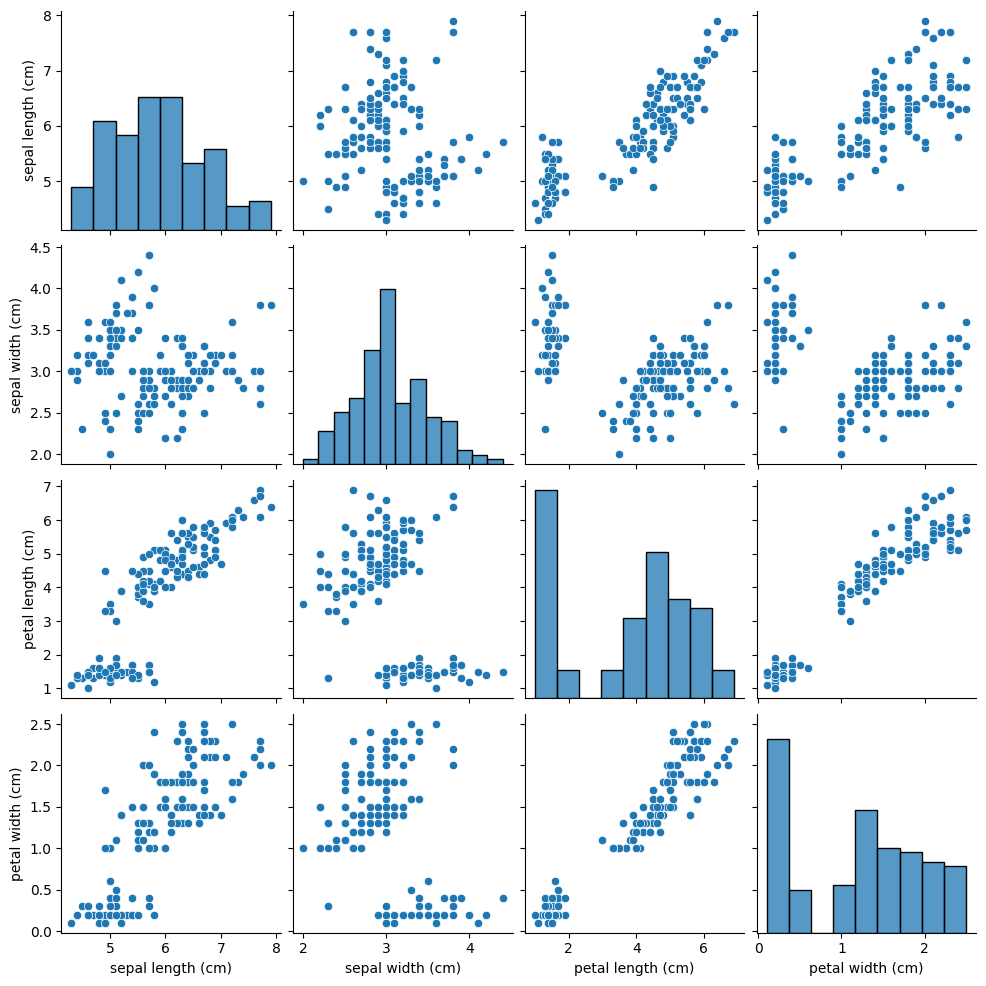

In [ ]:
sn.pairplot(X.loc[:,[str(x) for x in X.columns]] )
plt.show()

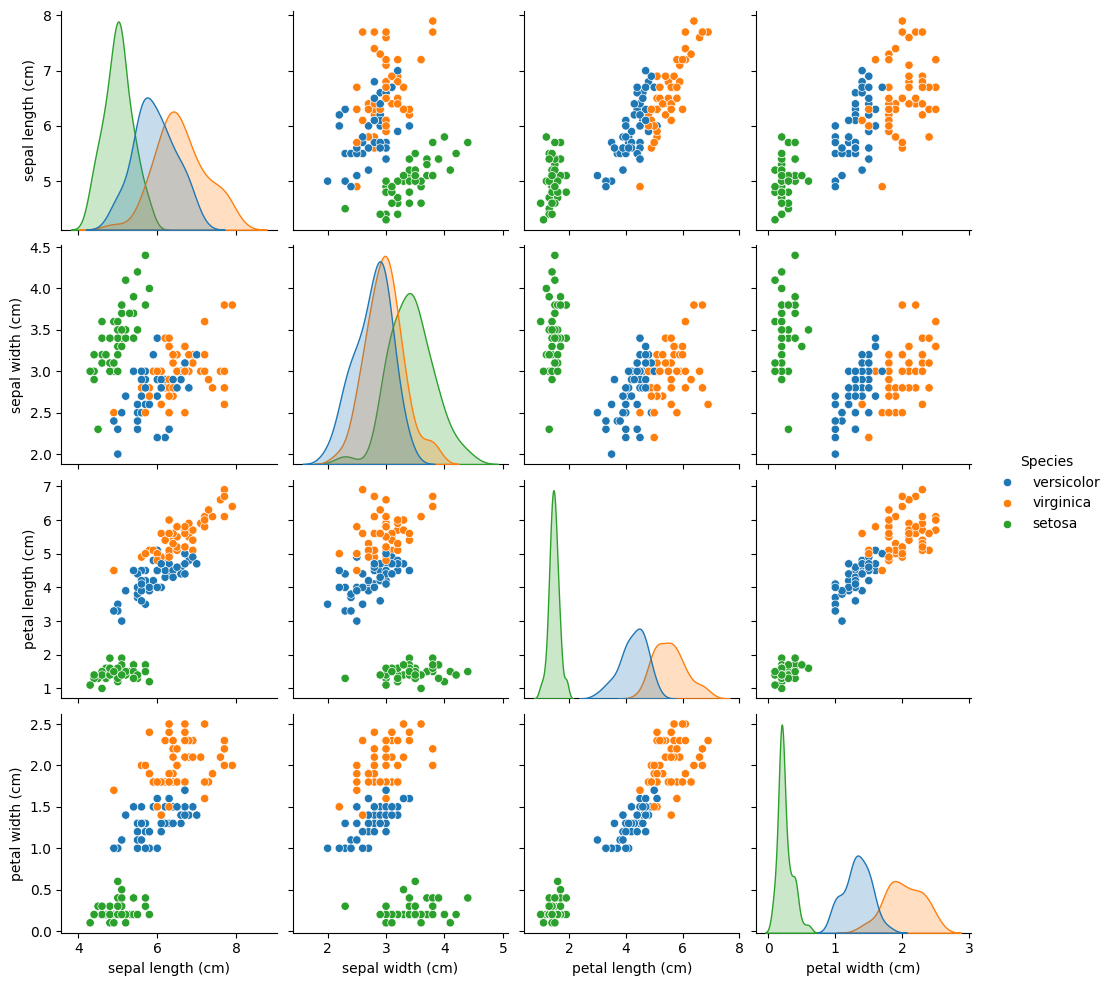

In [ ]:
sn.pairplot(data , kind="scatter", hue = "Species")
plt.show()

<Axes: >

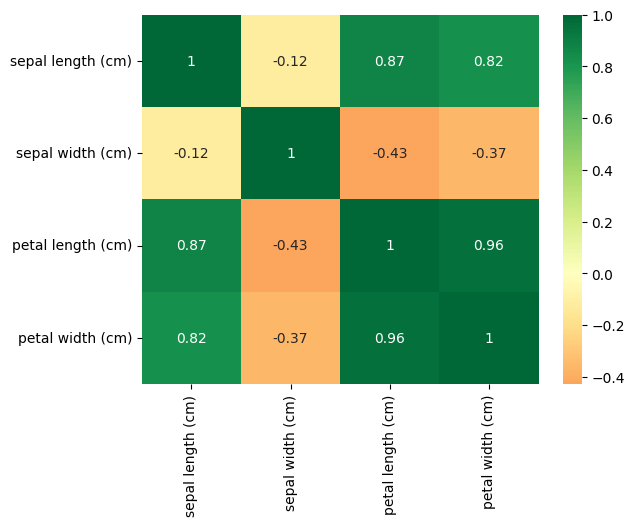

In [ ]:
sn.heatmap(X.corr(),cmap='RdYlGn', center=0, annot=True)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           6.423810          2.919048           4.604762          1.438095   
1           5.532143          2.635714           3.960714          1.228571   
2           6.596078          2.982353           5.549020          2.019608   
3           4.964516          3.416129           1.480645          0.248387   
4           5.073684          3.447368           1.431579          0.242105   

   Clusters  Actual_Species  Cluster  
0       0.0        0.857143      0.0  
1       2.0        1.000000      4.0  
2       3.0        0.980392      2.0  
3       1.0        0.516129      1.0  
4       4.0        2.000000      3.0  


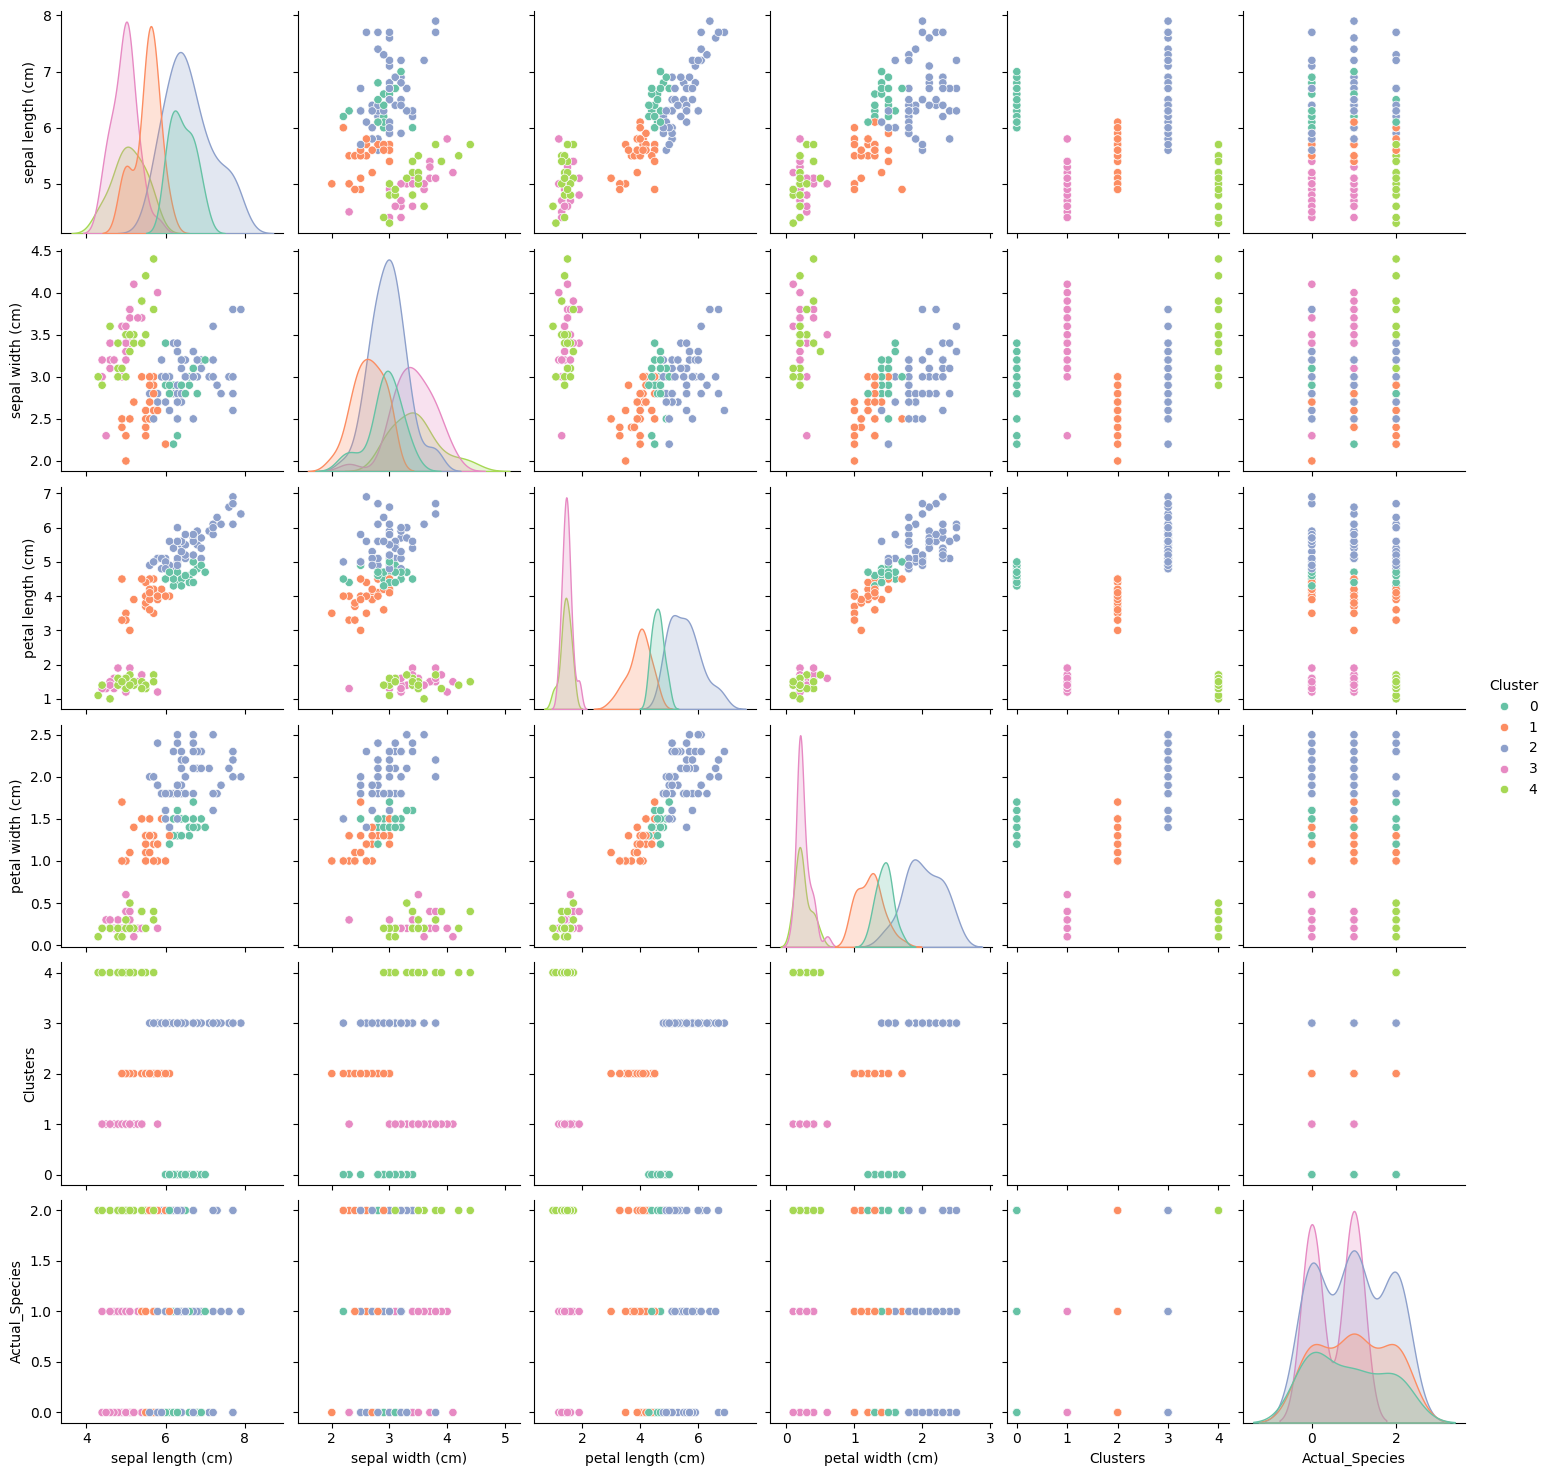

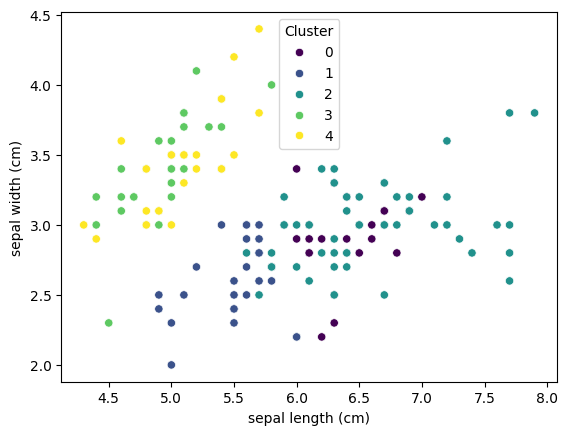

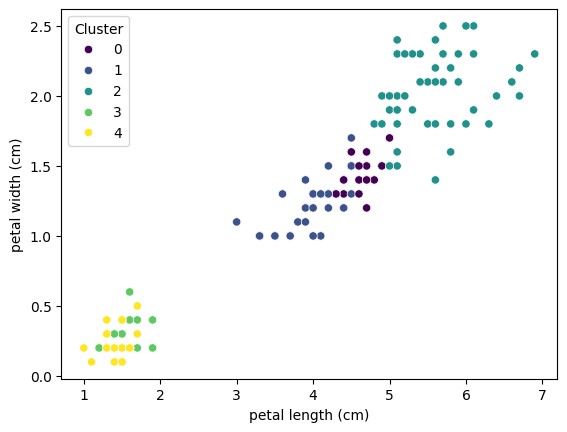

In [57]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 5 , random_state = 10 ,n_init = 10)

X['Cluster'] = kmeans.fit_predict(X)


cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

print(cluster_centers)


X['Cluster'] = kmeans.labels_


sn.pairplot(X, hue="Cluster", palette="Set2")

plt.show()


sn.scatterplot(x = X['sepal length (cm)'] , y = X['sepal width (cm)'] , hue = X['Cluster'] , palette='viridis')

plt.show()

sn.scatterplot(x = X['petal length (cm)'] , y = X['petal width (cm)'] , hue = X['Cluster'] , palette='viridis')

plt.show()
